# Compliance Radar

#### Team:
- Captain: Filippa Gronberg ()
- Alisa Lamina (321961)
- Evelina Ristovska ()
- Maiia Kopalina ()

### Summary
---
EDA
---

This is the most important dataset.
All ML will be trained on this table.

⸻

1️⃣ Data Structure & Quality

✔ 1.1 Column types & classification (done)
	•	Numerical
	•	Categorical
	•	Binary
	•	Ordinal (Likert 1–5)

✔ 1.2 Missing values (done)
	•	Count missing per column
	•	Percentage missing
	•	Missing values bar chart

✔ 1.3 Duplicates (done — none)

⸻

2️⃣ Descriptive Statistics

✔ 2.1 Summary statistics for numerical columns (you ran this)
	•	mean, std, min, max
	•	highlight outliers
	•	check inconsistent ranges

✔ 2.2 Identify special variable types
	•	Binary (0/1)
	•	Likert-type (1–5)
	•	Consider future encoding

⸻

3️⃣ Target Variable Analysis

Target = compliance_score_final

✔ 3.1 Distribution of target
	•	histogram / KDE
	•	boxplot
	•	detect skew/outliers

✔ 3.2 Relationship with key predictors
	•	pairplot with:
	•	overall_risk_score
	•	audit_score_q1
	•	audit_score_q2
	•	violations_past_3years
	•	training_hours_quarterly

⸻

4️⃣ Categorical Variables Analysis

✔ 4.1 Value counts for each category
	•	division
	•	dept_category
	•	dept_type
	•	location_type
	•	reporting_structure
	•	etc.

✔ 4.2 Class distribution visualizations
	•	bar plots
	•	percentages

✔ 4.3 Target differences across categories
	•	boxplots of compliance_score_final by category

⸻

5️⃣ Correlation Analysis

✔ 5.1 Correlation matrix for numerical columns
	•	full correlation matrix table
	•	heatmap

✔ 5.2 Identify top correlated features
	•	with target
	•	with risk scores
	•	check multicollinearity

⸻

6️⃣ Outlier Detection

(These require plotting)
	•	Boxplots for key variables
	•	Scatterplots for unusual values
	•	Identify:
	•	compliance_score_final >100 or <0
	•	overall_risk_score >100
	•	extremely high reporting gaps
	•	impossible values (e.g., negative training hours)

⸻

7️⃣ Feature Relationships

✔ 7.1 Pairplot for selected important features
	•	compliance score
	•	audit scores
	•	risk scores
	•	collaboration/resource scores

✔ 7.2 Scatterplots
	•	risk_exposure_operational vs compliance_score_final
	•	audit_score_q1 vs compliance_score_final

⸻

PHASE 2 — EDA on SECONDARY TABLES

8️⃣ risk_summary_by_division
	•	interpret division-level statistics
	•	compare Corporate_HQ vs Regional_Operations
	•	plot bar charts for:
	•	average compliance score
	•	average risk score
	•	total violations

⸻

9️⃣ high_risk_departments
	•	examine characteristics of high-risk subset
	•	compare to full dataset
	•	look for patterns:
	•	reporting structure
	•	department type
	•	geographical location
	•	risk scores
	•	training hours

⸻

🔟 data_dictionary
	•	use it to validate data meanings
	•	identify which columns need:
	•	encoding
	•	imputation
	•	scaling

⸻

PHASE 3 — Preprocessing Plan (after EDA)

📌 Not doing now — but EDA guides this step
	•	handle missing values
	•	encode categorical variables
	•	scale numerical variables
	•	feature engineering
	•	feature selection


### 1. EDA

In [123]:
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

conn = sqlite3.connect("org_compliance_data.db")

---
>##### Since .db files can contain many datasets, we first check how many datasets there are
---

In [126]:
#list all the datasets in 'org_compliance_data.db'
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)

                       name
0               departments
1  risk_summary_by_division
2     high_risk_departments
3           data_dictionary


---
>##### Loop through all tables and preview each one
>##### We take a quick look at each table to understand what it contains by displaying first 5 raws from every table.
---

In [129]:
# loop through all tables and show their structure
for table in tables["name"]:
    print(f"\n{'='*50}")
    print(f"Table: {table}")
    print("="*50)
    
    # show first few rows of the table
    df = pd.read_sql_query(f"SELECT * FROM {table} LIMIT 5;", conn)
    print(df.head())


Table: departments
     dept_id                   dept_name           dept_category  \
0  DEPT-1620             Core Compliance     Financial_Reporting   
1  DEPT-1133          Digital Governance     Financial_Reporting   
2  DEPT-4917                 Central Hub  Operational_Compliance   
3  DEPT-6959  Compliance - Legacy Region     Financial_Reporting   
4  DEPT-4312      West Internal Controls     Financial_Reporting   

       division   dept_type  dept_age_years location_type team_size  \
0  Corporate_HQ  Operations             8.0        Remote     Large   
1  Corporate_HQ  Compliance             8.0         Urban     Large   
2          None        None             NaN          None      None   
3  Corporate_HQ     Support             8.0         Urban     Large   
4  Corporate_HQ  Operations             6.0         Urban     Small   

  reporting_structure  manager_experience_level  ...  \
0         Centralized                       2.0  ...   
1         Centralized           

---
>##### This structure is very confusing so we will load each table one by one and explore them separately.
---

#### Table 1: 'departments'

In [133]:
df = pd.read_sql_query("SELECT * FROM departments;", conn)
print("Loaded 'departments' dataset:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

Loaded 'departments' dataset: (709, 37)
Columns: ['dept_id', 'dept_name', 'dept_category', 'division', 'dept_type', 'dept_age_years', 'location_type', 'team_size', 'reporting_structure', 'manager_experience_level', 'supervisor_experience_level', 'primary_function', 'secondary_function', 'creation_reason', 'oversight_body', 'reporting_lag_days', 'training_hours_quarterly', 'violations_past_3years', 'remediation_plan_active', 'executive_support', 'external_consulting', 'engagement_programs', 'onboarding_program', 'improvement_commitment', 'digital_systems', 'external_partnerships', 'interdept_collaboration_score', 'resource_availability_score', 'external_interactions_frequency', 'risk_exposure_operational', 'risk_exposure_financial', 'operational_health_index', 'reporting_gaps_annual', 'audit_score_q1', 'audit_score_q2', 'compliance_score_final', 'overall_risk_score']


dept_id                   dept_name           dept_category  \
0  DEPT-1620             Core Compliance     Financial_Reporting   
1  DEPT-1133          Digital Governance     Financial_Reporting   
2  DEPT-4917                 Central Hub  Operational_Compliance   
3  DEPT-6959  Compliance - Legacy Region     Financial_Reporting   
4  DEPT-4312      West Internal Controls     Financial_Reporting   

       division   dept_type  dept_age_years location_type team_size  \
0  Corporate_HQ  Operations             8.0        Remote     Large   
1  Corporate_HQ  Compliance             8.0         Urban     Large   
2          None        None             NaN          None      None   
3  Corporate_HQ     Support             8.0         Urban     Large   
4  Corporate_HQ  Operations             6.0         Urban     Small   

  reporting_structure  manager_experience_level  ...  \
0         Centralized                       2.0  ...   
1         Centralized                       2.0  ...   
2                None                       NaN  ...   
3         Centralized                       4.0  ...   
4         Centralized                       1.0  ...   

   resource_availability_score external_interactions_frequency  \
0                          2.0                             3.0   
1                          4.0                             NaN   
2                          NaN                             NaN   
3                          3.0                             4.0   
4                          4.0                             2.0   

  risk_exposure_operational risk_exposure_financial operational_health_index  \
0                       1.0                     NaN                      5.0   
1                       2.0                     2.0                      1.0   
2                       NaN                     NaN                      NaN   
3                       1.0                     1.0                      5.0   
4                       1.0                     1.0                      5.0   

   reporting_gaps_annual  audit_score_q1  audit_score_q2  \
0                    NaN            55.0            55.0   
1                   26.0             NaN            40.0   
2                    NaN             NaN             NaN   
3                    2.0            70.0            75.0   
4                    2.0            45.0            45.0   

   compliance_score_final  overall_risk_score  
0                    65.0                12.0  
1                     NaN                43.0  
2                     NaN                 NaN  
3                    85.0                11.0  
4                    45.0                11.0  

[5 rows x 37 columns]

#### Table 2: 'risk_summary_by_division'

In [136]:
df = pd.read_sql_query("SELECT * FROM risk_summary_by_division;", conn)
print("Loaded 'risk_summary_by_division' dataset:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

Loaded 'risk_summary_by_division' dataset: (2, 8)
Columns: ['division', 'avg_compliance_score', 'std_compliance_score', 'min_compliance_score', 'max_compliance_score', 'total_violations', 'avg_risk_score', 'dept_count']


division  avg_compliance_score  std_compliance_score  \
0         Corporate_HQ             63.245477             13.369017   
1  Regional_Operations             76.054167             13.777896   

   min_compliance_score  max_compliance_score  total_violations  \
0                   0.0                  95.0             122.0   
1                  50.8                 100.0              55.0   

   avg_risk_score  dept_count  
0       24.463636         428  
1       64.000000          27

#### Table 3: 'high_risk_departments'

In [139]:
df = pd.read_sql_query("SELECT * FROM high_risk_departments;", conn)
print("Loaded 'high_risk_departments' dataset:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

Loaded 'high_risk_departments' dataset: (201, 37)
Columns: ['dept_id', 'dept_name', 'dept_category', 'division', 'dept_type', 'dept_age_years', 'location_type', 'team_size', 'reporting_structure', 'manager_experience_level', 'supervisor_experience_level', 'primary_function', 'secondary_function', 'creation_reason', 'oversight_body', 'reporting_lag_days', 'training_hours_quarterly', 'violations_past_3years', 'remediation_plan_active', 'executive_support', 'external_consulting', 'engagement_programs', 'onboarding_program', 'improvement_commitment', 'digital_systems', 'external_partnerships', 'interdept_collaboration_score', 'resource_availability_score', 'external_interactions_frequency', 'risk_exposure_operational', 'risk_exposure_financial', 'operational_health_index', 'reporting_gaps_annual', 'audit_score_q1', 'audit_score_q2', 'compliance_score_final', 'overall_risk_score']


dept_id                            dept_name        dept_category  \
0  DEPT-1133                   Digital Governance  Financial_Reporting   
1  DEPT-4312               West Internal Controls  Financial_Reporting   
2  DEPT-3347  Business Integrity - Central Region  Financial_Reporting   
3  DEPT-2554                         Central Team  Financial_Reporting   
4  DEPT-3151             Compliance - East Region  Financial_Reporting   

       division   dept_type  dept_age_years location_type team_size  \
0  Corporate_HQ  Compliance             8.0         Urban     Large   
1  Corporate_HQ  Operations             6.0         Urban     Small   
2  Corporate_HQ  Operations             6.0         Urban     Small   
3  Corporate_HQ     Support             5.0         Urban     Small   
4  Corporate_HQ        None             8.0         Urban     Small   

  reporting_structure  manager_experience_level  ...  \
0         Centralized                       2.0  ...   
1         Centralized                       1.0  ...   
2         Centralized                       2.0  ...   
3          Autonomous                       3.0  ...   
4         Centralized                       3.0  ...   

   resource_availability_score external_interactions_frequency  \
0                          4.0                             NaN   
1                          4.0                             2.0   
2                          4.0                             4.0   
3                          3.0                             4.0   
4                          2.0                             4.0   

  risk_exposure_operational risk_exposure_financial operational_health_index  \
0                       2.0                     2.0                      1.0   
1                       1.0                     1.0                      5.0   
2                       3.0                     5.0                      5.0   
3                       4.0                     4.0                      1.0   
4                       NaN                     4.0                      4.0   

   reporting_gaps_annual  audit_score_q1  audit_score_q2  \
0                   26.0             NaN            40.0   
1                    2.0            45.0            45.0   
2                    6.0            45.0            50.0   
3                    0.0            65.0            60.0   
4                   10.0            50.0            50.0   

   compliance_score_final  overall_risk_score  
0                     NaN                43.0  
1                    45.0                11.0  
2                    50.0                53.0  
3                    65.0                40.0  
4                    50.0                35.0  

[5 rows x 37 columns]

#### Table 4: 'data_dictionary'

In [142]:
pd.set_option('display.max_colwidth', None) #to not cut the text since it is a dictionary table
df = pd.read_sql_query("SELECT * FROM data_dictionary;", conn)
print("Loaded 'data_dictionary' dataset:", df.shape)
print("Columns:", df.columns.tolist())
df.head(39)

Loaded 'data_dictionary' dataset: (39, 4)
Columns: ['table_name', 'field_name', 'data_type', 'description']


table_name                       field_name data_type  \
0   departments                          dept_id    string   
1   departments                        dept_name    string   
2   departments                    dept_category    string   
3   departments                         division    string   
4   departments                        dept_type    string   
5   departments                   dept_age_years   integer   
6   departments                    location_type    string   
7   departments                        team_size    string   
8   departments              reporting_structure    string   
9   departments         manager_experience_level   integer   
10  departments      supervisor_experience_level   integer   
11  departments                 primary_function    string   
12  departments               secondary_function    string   
13  departments                  creation_reason    string   
14  departments                   oversight_body    string   
15  departments               reporting_lag_days   integer   
16  departments         training_hours_quarterly   integer   
17  departments           violations_past_3years   integer   
18  departments            reporting_gaps_annual   integer   
19  departments          remediation_plan_active   integer   
20  departments                executive_support   integer   
21  departments              external_consulting   integer   
22  departments              engagement_programs   integer   
23  departments               onboarding_program   integer   
24  departments           improvement_commitment   integer   
25  departments                  digital_systems   integer   
26  departments            external_partnerships   integer   
27  departments    interdept_collaboration_score   integer   
28  departments      resource_availability_score   integer   
29  departments  external_interactions_frequency   integer   
30  departments        risk_exposure_operational   integer   
31  departments          risk_exposure_financial   integer   
32  departments         operational_health_index   integer   
33  departments               overall_risk_score     float   
34  departments                   audit_score_q1     float   
35  departments                   audit_score_q2     float   
36  departments           compliance_score_final     float   
37    _metadata                         project_    string   
38    _metadata                    academic_year    string   

                                                                                         description  
0                                                                       Unique department identifier  
1                                                                                    Department name  
2         Primary compliance category (Financial_Reporting, Operational_Compliance, Risk_Management)  
3                                        Organizational division (Corporate_HQ, Regional_Operations)  
4                      Department type (Operations, Support, Compliance, Finance, Technology, Legal)  
5                                                     Age of department in years since establishment  
6                                  Geographic location type (Urban, Remote, Suburban, International)  
7                                                          Team size category (Small, Medium, Large)  
8                                              Reporting hierarchy (Centralized, Autonomous, Hybrid)  
9                                                   Manager experience level (0=none to 4=extensive)  
10                                               Supervisor experience level (0=none to 4=extensive)  
11                                                                         Primary business function  
12                                                                       Secondary business function  
13         Reason for department creation (Merger, Expansion, Regulation, Restruct

---
#### **Conclusions so far**
**1) No need to rename columns, they are already in a convinient format** 

**2) Learned from the tables structure:** 

**1. `departments`**  
This is the core dataset containing detailed information about each department, such as its category, division, team size, managerial structure, and several operational, financial, and compliance-related indicators.  
→ We will perform full exploratory data analysis (EDA) on this table:
- Check for missing values and data types  
- Generate descriptive statistics  
- Identify distributions and outliers  
- Explore relationships between risk and compliance metrics  
- Prepare data for modeling

**2. `risk_summary_by_division`**  
Provides aggregated information by division (Corporate_HQ, Regional_Operations).  
→ We will check data consistency and analyze differences between divisions.

**3. `high_risk_departments`**  
A filtered subset of departments with high overall risk scores.  
→ We will compare these departments to others in the main dataset to find patterns linked to high risk.

**4. `data_dictionary`**  
Describes all variables and their meanings.  
→ We will use this table as a reference throughout the analysis.

---

#### **1. Table `"departments"`**  

#####   **1.1 Dataset shape**

In [147]:
departments = pd.read_sql_query("SELECT * FROM departments", conn)

# Display the shape of the dataset
print("Shape of the dataset:", departments.shape)

Shape of the dataset: (709, 37)


In [149]:
# Display data types
print("\nData types:")
print(departments.dtypes)


Data types:
dept_id                             object
dept_name                           object
dept_category                       object
division                            object
dept_type                           object
dept_age_years                     float64
location_type                       object
team_size                           object
reporting_structure                 object
manager_experience_level           float64
supervisor_experience_level        float64
primary_function                    object
secondary_function                  object
creation_reason                     object
oversight_body                      object
reporting_lag_days                 float64
training_hours_quarterly           float64
violations_past_3years             float64
remediation_plan_active            float64
executive_support                  float64
external_consulting                float64
engagement_programs                float64
onboarding_program                 float6

In [151]:
# 1. Categorical columns 
categorical_cols = departments.select_dtypes(include=['object']).columns.tolist()

# 2. Numerical columns 
numerical_cols = departments.select_dtypes(include=['int64', 'float64']).columns.tolist()

# 3. Check for any other data types 
other_types = departments.columns.difference(categorical_cols + numerical_cols).tolist()


print("Number of categorical columns:", len(categorical_cols))
print("\nNumber of numerical columns:", len(numerical_cols))
print("\nOther column types (if any):", other_types)

Number of categorical columns: 12

Number of numerical columns: 25

Other column types (if any): []


---
>**Categorical Columns (12 total)**
> - These columns will later require encoding and cleaning

>**Numeric Columns (22 total)**
> - These columns will later require cleaning
---

#####   **1.2 Missing Values**

In [155]:
# Missing Values

missing = departments.isnull().sum().sort_values(ascending=False)

# Count missing values per column
print("Missing values per column:")
print(departments.isnull().sum())

Missing values per column:
dept_id                              0
dept_name                            0
dept_category                        0
division                           254
dept_type                          296
dept_age_years                     298
location_type                      299
team_size                          300
reporting_structure                296
manager_experience_level           296
supervisor_experience_level        300
primary_function                   293
secondary_function                 294
creation_reason                    297
oversight_body                     303
reporting_lag_days                 297
training_hours_quarterly           300
violations_past_3years             303
remediation_plan_active            298
executive_support                  296
external_consulting                295
engagement_programs                299
onboarding_program                 302
improvement_commitment             292
digital_systems                    30

In [157]:
# Percentage of missing values per column
missing_percent = departments.isnull().mean() * 100
print("\nPercentage of missing values per column:")
print(missing_percent.sort_values(ascending=False))


Percentage of missing values per column:
digital_systems                    42.877292
external_interactions_frequency    42.736248
interdept_collaboration_score      42.736248
oversight_body                     42.736248
violations_past_3years             42.736248
onboarding_program                 42.595205
overall_risk_score                 42.313117
training_hours_quarterly           42.313117
team_size                          42.313117
external_partnerships              42.313117
supervisor_experience_level        42.313117
risk_exposure_financial            42.172073
resource_availability_score        42.172073
location_type                      42.172073
engagement_programs                42.172073
operational_health_index           42.031030
remediation_plan_active            42.031030
dept_age_years                     42.031030
creation_reason                    41.889986
reporting_gaps_annual              41.889986
reporting_lag_days                 41.889986
manager_exper

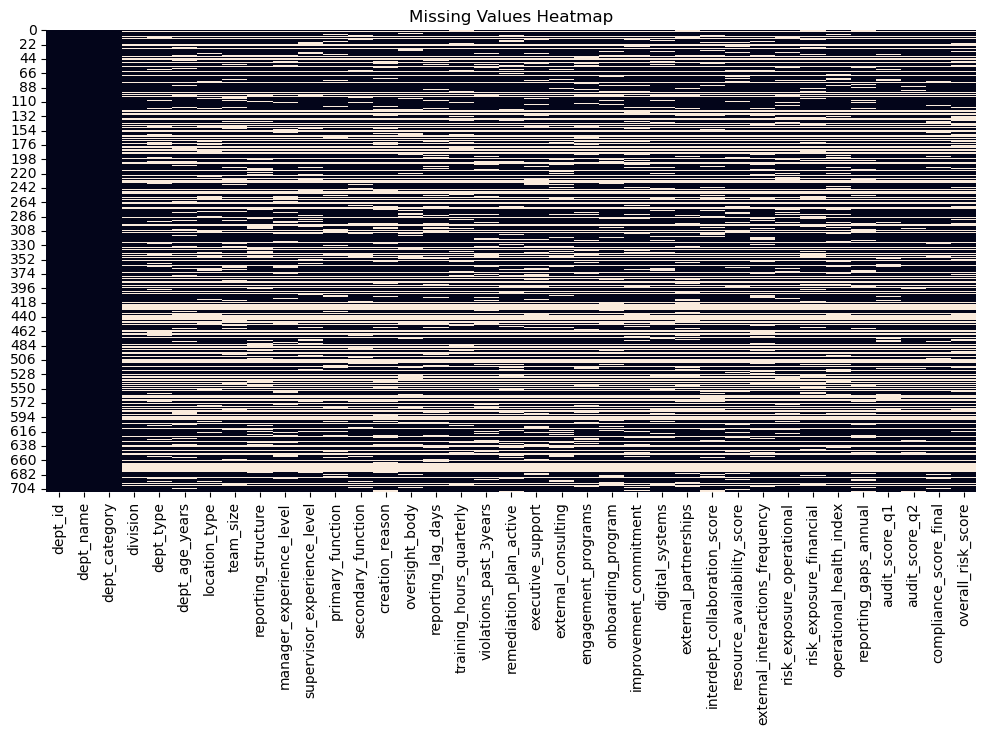

In [159]:


plt.figure(figsize=(12,6))
sns.heatmap(departments.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

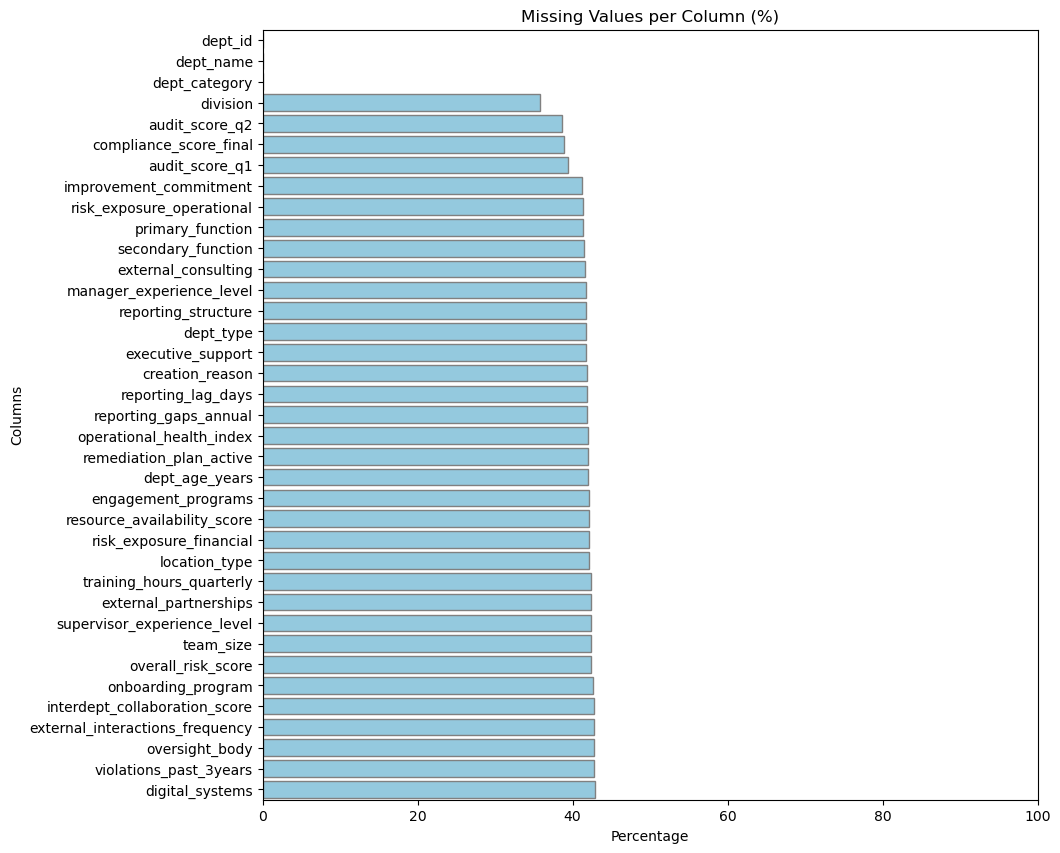

In [160]:
plt.figure(figsize=(10, 10))
sns.barplot( #sort by percent
    x=missing_percent.sort_values(),
    y=missing_percent.sort_values().index,
    color='skyblue',
    edgecolor='grey'
)
plt.xlim(0, 100)
plt.title("Missing Values per Column (%)")
plt.xlabel("Percentage")
plt.ylabel("Columns")
plt.show()

---

>**In most columns 36-42% of data is missing:**
>
> → We miss a lot of data, hich makes the columns unreliable for analysis or modeling unless handled (dropped, imputed, or analysed separately)
>
>**Only dept_id, dept_name, and dept_category are complete (0% missing)**
>
> → These are identifiers and categorical descriptors — stable and useful for grouping and joining.

---

#####   **1.3 Douplicates**

In [165]:
# Count duplicates
duplicates = departments.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


> No two rows have exactly the same values across all columns.
> 
> → So we don't need to clean or drop duplicates.

#####   **1.4 Summary statistics for numerical columns**

In [169]:
print(departments.shape[0])
# Summary statistics for numerical columns
numeric_summary = departments.describe()
display(numeric_summary)

709


dept_age_years  manager_experience_level  supervisor_experience_level  \
count      411.000000                413.000000                   409.000000   
mean         6.802920                  2.624697                     2.398533   
std          1.915939                  1.164637                     1.137635   
min          2.000000                  0.000000                     0.000000   
25%          6.000000                  2.000000                     2.000000   
50%          7.000000                  3.000000                     2.000000   
75%          8.000000                  4.000000                     3.000000   
max         15.000000                  4.000000                     4.000000   

       reporting_lag_days  training_hours_quarterly  violations_past_3years  \
count          412.000000                409.000000              406.000000   
mean             1.682039                 43.180929                0.435961   
std              1.019693                 19.728215                1.108703   
min              1.000000                 12.000000                0.000000   
25%              1.000000                 20.000000                0.000000   
50%              1.000000                 40.000000                0.000000   
75%              2.000000                 60.000000                0.000000   
max              5.000000                100.000000                5.000000   

       remediation_plan_active  executive_support  external_consulting  \
count               411.000000         413.000000           414.000000   
mean                  0.175182           0.607748             0.123188   
std                   0.380586           0.488845             0.329051   
min                   0.000000           0.000000             0.000000   
25%                   0.000000           0.000000             0.000000   
50%                   0.000000           1.000000             0.000000   
75%                   0.000000           1.000000             0.000000   
max                   1.000000           1.000000             1.000000   

       engagement_programs  ...  resource_availability_score  \
count           410.000000  ...                   410.000000   
mean              0.519512  ...                     3.190244   
std               0.500230  ...                     1.061854   
min               0.000000  ...                     1.000000   
25%               0.000000  ...                     3.000000   
50%               1.000000  ...                     3.000000   
75%               1.000000  ...                     4.000000   
max               1.000000  ...                     5.000000   

       external_interactions_frequency  risk_exposure_operational  \
count                       406.000000                 416.000000   
mean                          3.086207                   1.673077   
std                           1.190479                   1.112404   
min                           1.000000                   1.000000   
25%                           2.000000                   1.000000   
50%                           3.000000                   1.000000   
75%                           4.000000                   2.000000   
max                           5.000000                   5.000000   

       risk_exposure_financial  operational_health_index  \
count               410.000000                411.000000   
mean                  2.360976                  3.491484   
std                   1.361877                  1.447218   
min                   1.000000                  1.000000   
25%                   1.000000                  2.000000   
50%                   2.000000                  4.000000   
75%                   3.000000                  5.000000   
max                   5.000000                  5.000000   

       reporting_gaps_annual  audit_score_q1  audit_score_q2  \
count             412.000000      430.000000      435.000000   
mean                5.114078       61.7

>***Variable types:***
>
>- Binary variables (e.g. remediation_plan_active, executive_support, etc) are already encoded as 0/1 and can be kept as they are. No invalid or negative.
>
>- Likert-scale (1-5) variables (e.g. manager_experience_level, supervisor_experience_level, etc) represent ordered categories and can be treated as numeric for correlation and visualization. But all values stay within 1-5, therefore, no invalid or negative.
>
>- Counts (e.g. violations_past_3years, reporting_lag_days, etc) for small integers. No negatives. 
>
>- Continuous wide-range scores (0–100), e.g. audit_score_q1, audit_score_q2. No negatives.
>
>Most variables are missing a lot of values — usually around 40%. This likely happens because some departments do not report certain information at all. Because of this, the dataset is far from complete and will need missing data handling, either by filling in values or choosing which variables to keep.

#####   **1.5 Outliers check**

In [173]:
print("Checking for potential outliers in numeric columns:")

for col in num_cols:

    series = departments[col].dropna() #drop missing values to ensure the IQR, bounds, and outlier count are calculated only on actual values
    
    # Compute IQR
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    print(f"{col}: {len(outliers)} potential outliers")

Checking for potential outliers in numeric columns:
dept_age_years: 22 potential outliers
manager_experience_level: 0 potential outliers
supervisor_experience_level: 11 potential outliers
reporting_lag_days: 36 potential outliers
training_hours_quarterly: 0 potential outliers
violations_past_3years: 75 potential outliers
remediation_plan_active: 72 potential outliers
executive_support: 0 potential outliers
external_consulting: 51 potential outliers
engagement_programs: 0 potential outliers
onboarding_program: 0 potential outliers
improvement_commitment: 56 potential outliers
digital_systems: 88 potential outliers
external_partnerships: 0 potential outliers
interdept_collaboration_score: 0 potential outliers
resource_availability_score: 26 potential outliers
external_interactions_frequency: 0 potential outliers
risk_exposure_operational: 40 potential outliers
risk_exposure_financial: 0 potential outliers
operational_health_index: 0 potential outliers
reporting_gaps_annual: 19 potential 

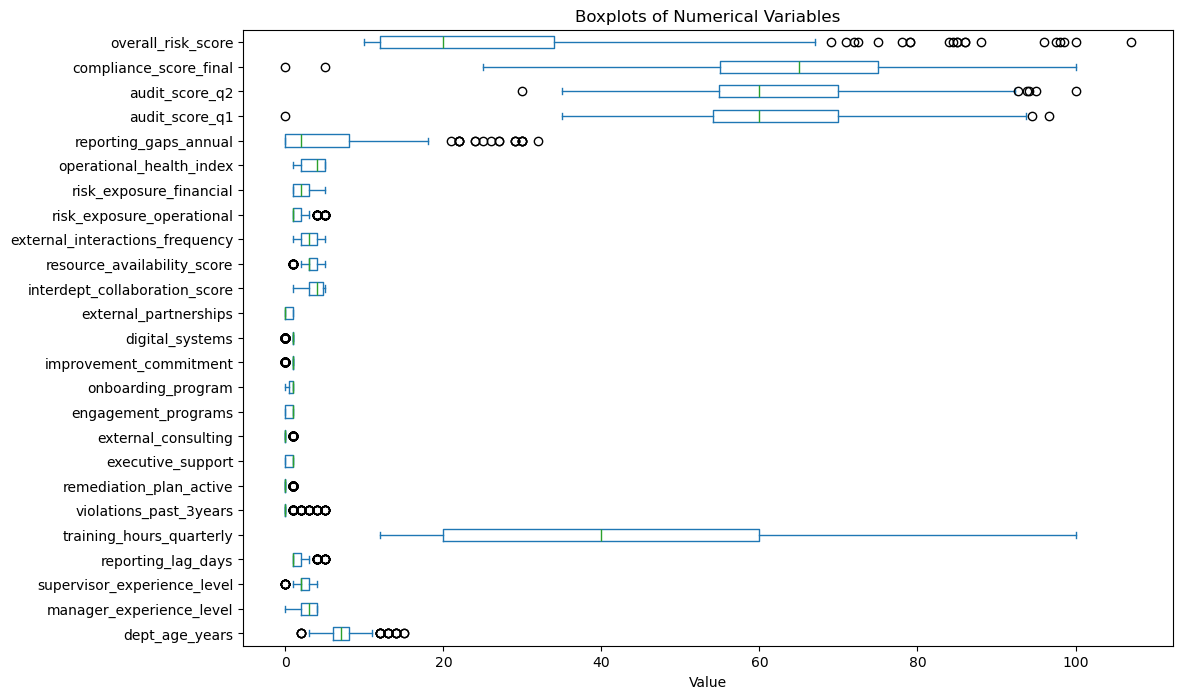

In [174]:
# Visualize numeric columns with boxplots
departments[num_cols].plot(kind='box', vert=False, figsize=(12, 8))
plt.title('Boxplots of Numerical Variables')
plt.xlabel('Value')
plt.show()

> 1. Many variables have a large number of outliers
>- Variables like overall_risk_score, compliance_score_final, audit scores, reporting_gaps_annual, and violations_past_3years >show many points outside the whiskers. Therefore, the distributions are not tightly clustered and have extreme high or low values.
>
> These outliers could be:
>- Genuine extreme departments
>- Reporting inconsistencies
>- Structural differences between departments
>
>2. Several variables are highly skewed
>- Training_hours_quarterly stretches from 12 to 100+.
>- Reporting_gaps_annual has many extreme high values.
>- Violations_past_3years has many zeros but also some high violators.
>
>This indicates right-skewed distributions (long tail), not normal (bell-shaped) behavior.
>
>3. Likert-scale and binary variables show little variation
>
>Variables such as:
>- executive_support
>- external_consulting
>- engagement_programs
>- resource_availability_score
>
>show:
>- Tight boxes,
>- Short whiskers,
>- Few outliers,
>
>meaning departments tend to score similarly on these.
>
>4. Some variables are almost categorical
>
>For example:
>- digital_systems
>- supervisor_experience_level
>- manager_experience_level
>
>show narrow ranges and few unique values → they behave like ordinal categorical variables, not continuous.
>
>5. Variability differs strongly across variables
>
>You can visually see that:
>- Some distributions are wide (e.g., training hours, risk scores),
>- Some are extremely narrow (e.g., reporting lag, experience levels),
>- Some are discrete (violations count),
>- Some have almost no spread (binary variables).
>
>This matters because:
>- Different preprocessing steps will be needed,
>- A single normalization method will not fit all.

#####   **1.6 Distribution**

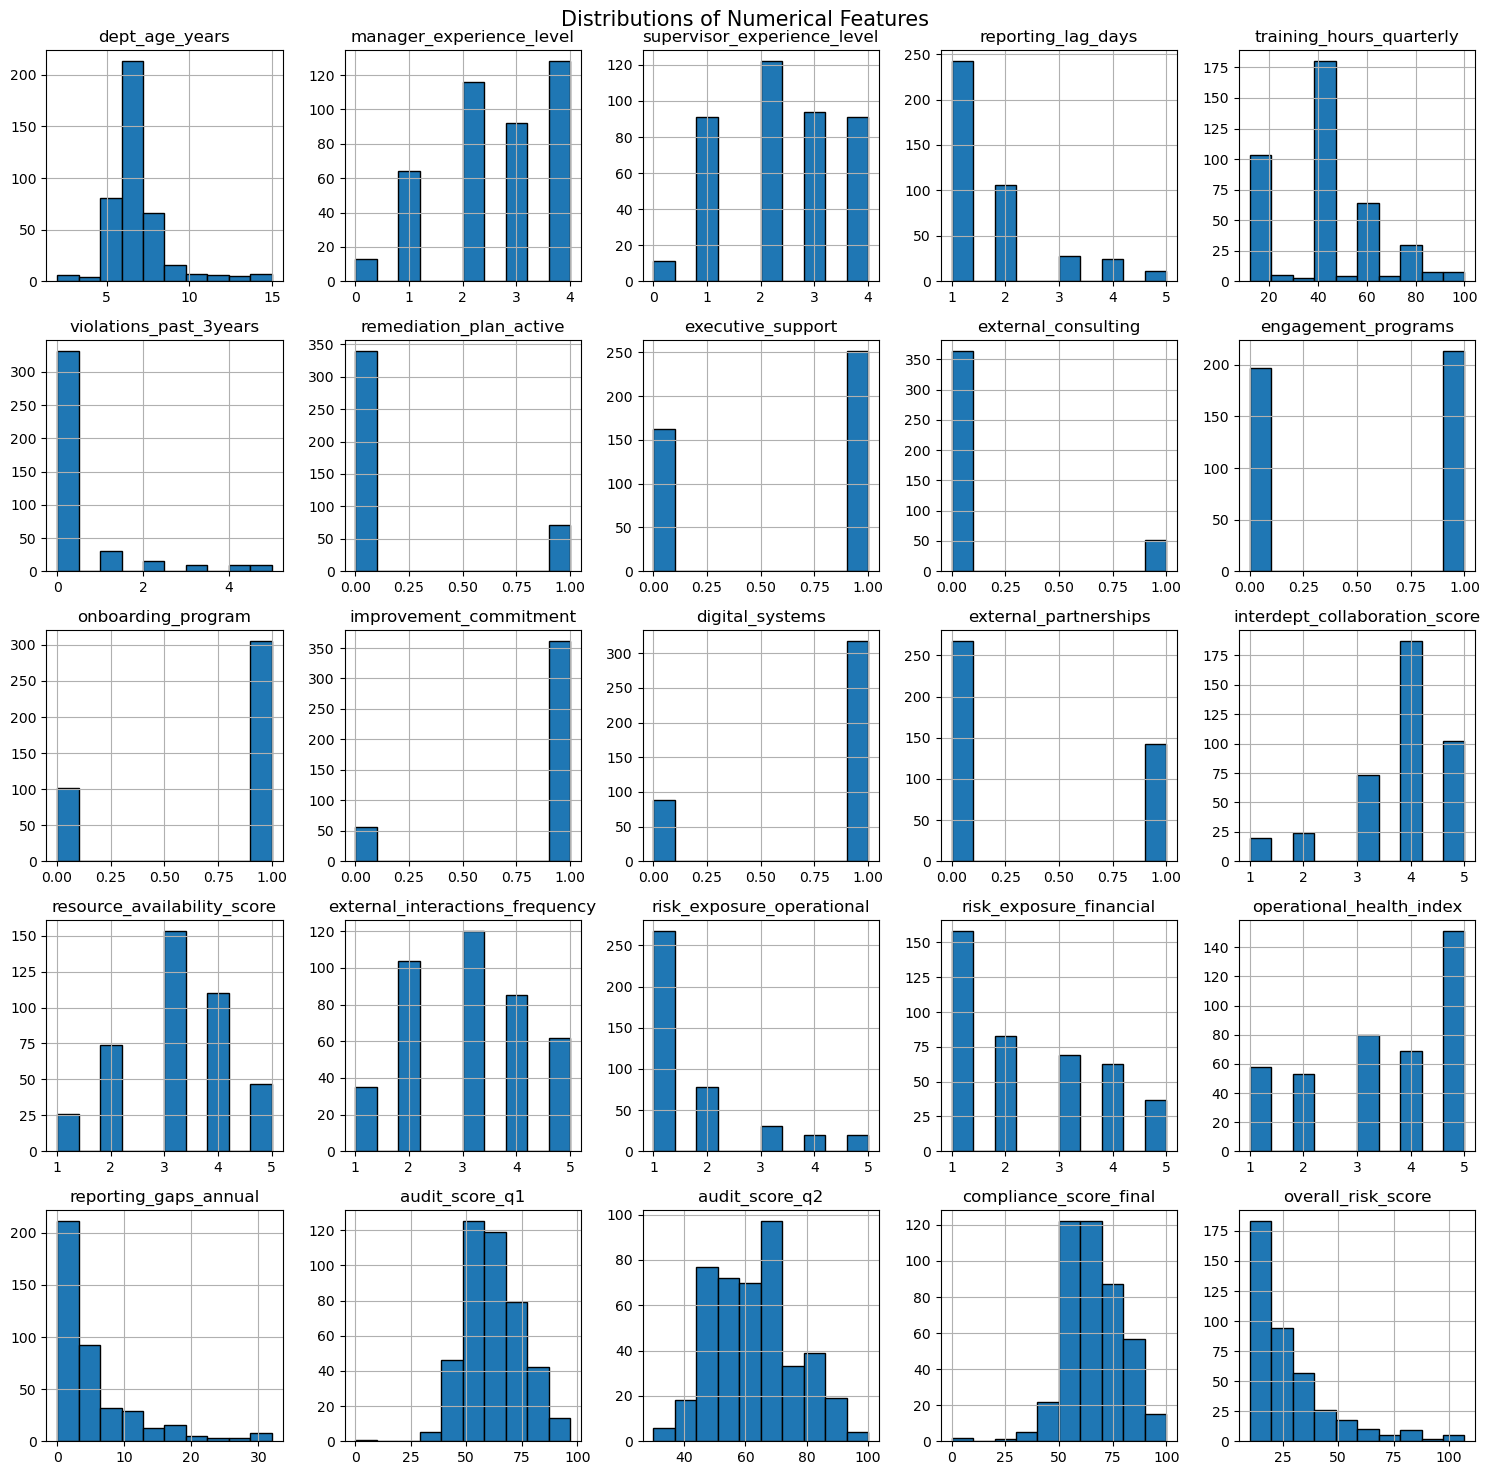

In [179]:
# Select only numerical columns
num_cols = departments.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms
departments[num_cols].hist(figsize=(15, 15), edgecolor='black')
plt.suptitle("Distributions of Numerical Features", fontsize=15)
plt.tight_layout()
plt.show()

> The numerical distributions show that most features are not normally distributed. Many are strongly right-skewed, with heavy tails and clear outliers. Repeating for the 4th time, several variables are actually binary or ordinal (1–5 scales), despite being stored as numbers. Only a few variables resemble normal distributions. 

#####   **1.7 Pairplot - Relationships Between Variables**

In [182]:
# Select only numerical columns
num_cols = departments.select_dtypes(include=['float64', 'int64']).columns

# Sample if the dataset is large (optional)
sample = departments[num_cols].sample(300, random_state=42) if len(departments) > 300 else departments[num_cols]

# Pairplot
sns.pairplot(
    sample,
    corner=True,
    diag_kind='kde',
    plot_kws={'alpha': 0.6, 's': 25, 'edgecolor': 'none'},
    height=3  # default is 2.0, increase to 2.5 or 3.0
)
plt.suptitle("Pairplot of Numerical Columns", y=1.02)
plt.show()

> - Strong positive correlations are observed between audit scores (q1 and q2) and final compliance score.
> - Features like 'violations_past_3years' and 'overall_risk_score' show clear positive relationships.
> - Some variables appear independent and may contribute unique information for modeling.

#####   **1.8 Correlation analysis**

Correlation matrix:


dept_age_years  manager_experience_level  \
dept_age_years                            1.000                    -0.078   
manager_experience_level                 -0.078                     1.000   
supervisor_experience_level              -0.074                     0.485   
reporting_lag_days                        0.201                    -0.186   
training_hours_quarterly                  0.126                    -0.061   
violations_past_3years                    0.281                    -0.181   
remediation_plan_active                   0.076                    -0.059   
executive_support                        -0.079                     0.112   
external_consulting                       0.071                     0.015   
engagement_programs                       0.049                     0.110   
onboarding_program                       -0.103                     0.193   
improvement_commitment                   -0.317                     0.171   
digital_systems                          -0.160                     0.196   
external_partnerships                     0.156                    -0.044   
interdept_collaboration_score            -0.161                     0.066   
resource_availability_score              -0.164                     0.093   
external_interactions_frequency          -0.015                     0.017   
risk_exposure_operational                 0.233                    -0.136   
risk_exposure_financial                   0.155                    -0.048   
operational_health_index                  0.006                     0.067   
reporting_gaps_annual                     0.305                    -0.056   
audit_score_q1                            0.106                     0.060   
audit_score_q2                            0.101                     0.085   
compliance_score_final                    0.111                     0.088   
overall_risk_score                        0.294                    -0.179   

                                 supervisor_experience_level  \
dept_age_years                                        -0.074   
manager_experience_level                               0.485   
supervisor_experience_level                            1.000   
reporting_lag_days                                    -0.189   
training_hours_quarterly                              -0.096   
violations_past_3years                                -0.179   
remediation_plan_active                                0.031   
executive_support                                      0.180   
external_consulting                                   -0.019   
engagement_programs                                   -0.014   
onboarding_program                                     0.090   
improvement_commitment                                 0.204   
digital_systems                                        0.156   
external_partnerships                                 -0.110   
interdept_collaboration_score                          0.048   
resource_availability_score                           -0.087   
external_interactions_frequency                        0.047   
risk_exposure_operational                             -0.048   
risk_exposure_financial                               -0.011   
operational_health_index                               0.076   
reporting_gaps_annual                                 -0.030   
audit_score_q1                                         0.128   
audit_score_q2                                         0.127   
compliance_score_final                                 0.131   
overall_risk_score                                    -0.109   

                                 reporting_lag_days  training_hours_quarterly  \
dept_age_years                                0.201                     0.126   
manager_experience_level                     -0.186                    -0.061   
supervisor_experience_level                  -0.189                    -0.096   
reporting_lag_days                       

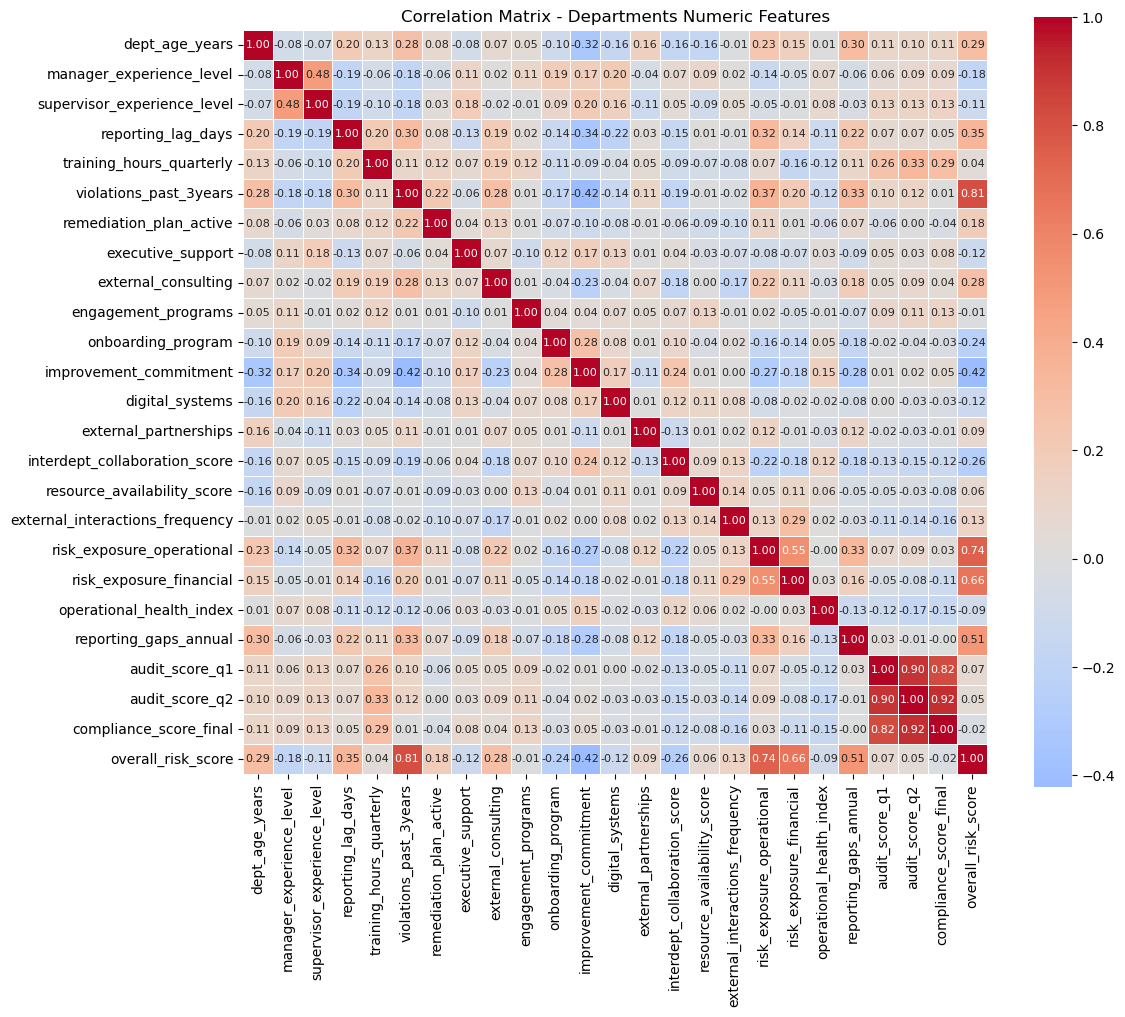


Feature correlations with overall_risk_score (ranked by absolute value):
violations_past_3years             0.814921
risk_exposure_operational          0.743653
risk_exposure_financial            0.663476
reporting_gaps_annual              0.510729
improvement_commitment            -0.419048
reporting_lag_days                 0.346762
dept_age_years                     0.293644
external_consulting                0.283343
interdept_collaboration_score     -0.258207
onboarding_program                -0.240435
manager_experience_level          -0.178728
remediation_plan_active            0.178093
external_interactions_frequency    0.133003
digital_systems                   -0.121986
executive_support                 -0.119282
supervisor_experience_level       -0.109154
operational_health_index          -0.085394
external_partnerships              0.085038
audit_score_q1                     0.068817
resource_availability_score        0.061601
audit_score_q2                     0.048650
tr

In [184]:
# Compute correlation matrix for numeric columns
correlation_matrix = departments[num_cols].corr()
print("Correlation matrix:")
display(correlation_matrix.round(3))

# Visualize correlation matrix with smaller numbers
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f",            # 2 decimal places
    annot_kws={"size": 8}, # smaller font size
    cmap='coolwarm', 
    center=0,
    square=True, 
    linewidths=0.5
)
plt.title('Correlation Matrix - Departments Numeric Features')
plt.show()

# Identify strongest correlations with overall_risk_score
risk_correlations = correlation_matrix['overall_risk_score'].drop('overall_risk_score').sort_values(key=abs, ascending=False)
print(f"\nFeature correlations with overall_risk_score (ranked by absolute value):")
print(risk_correlations)

In [185]:
# Show all unique divisions and how many departments each has

print("List of divisions and department counts:")
print(df['division'].value_counts(dropna=False))

List of divisions and department counts:
division
Corporate_HQ           428
None                   254
Regional_Operations     27
Name: count, dtype: int64


>- 'violations_past_3years' shows the strongest positive correlation with 'overall_risk_score' (0.815), followed by 'risk_exposure_operational' (0.744) and 'risk_exposure_financial' (0.663).
>- Audit scores and final compliance score have weak negative correlation with overall risk, as expected.
>- Several features (e.g., 'improvement_commitment', 'reporting_lag_days') have moderate correlations with risk, which could be relevant for predictive modeling.
>- There are some highly correlated pairs among numeric features (audit scores q1/q2, compliance score final/audit scores), suggesting potential multicollinearity to consider.

#####   **1.9 Division-dependencies analysis**


Mean and standard deviation by Division:
                    dept_age_years       manager_experience_level        \
                              mean   std                     mean   std   
division                                                                  
Corporate_HQ                  6.65  1.58                     2.65  1.14   
Regional_Operations           9.39  4.14                     2.23  1.42   

                    supervisor_experience_level       reporting_lag_days  \
                                           mean   std               mean   
division                                                                   
Corporate_HQ                               2.42  1.11               1.59   
Regional_Operations                        2.08  1.44               3.00   

                          training_hours_quarterly         ...  \
                      std                     mean    std  ...   
division                                                   ...   
Cor

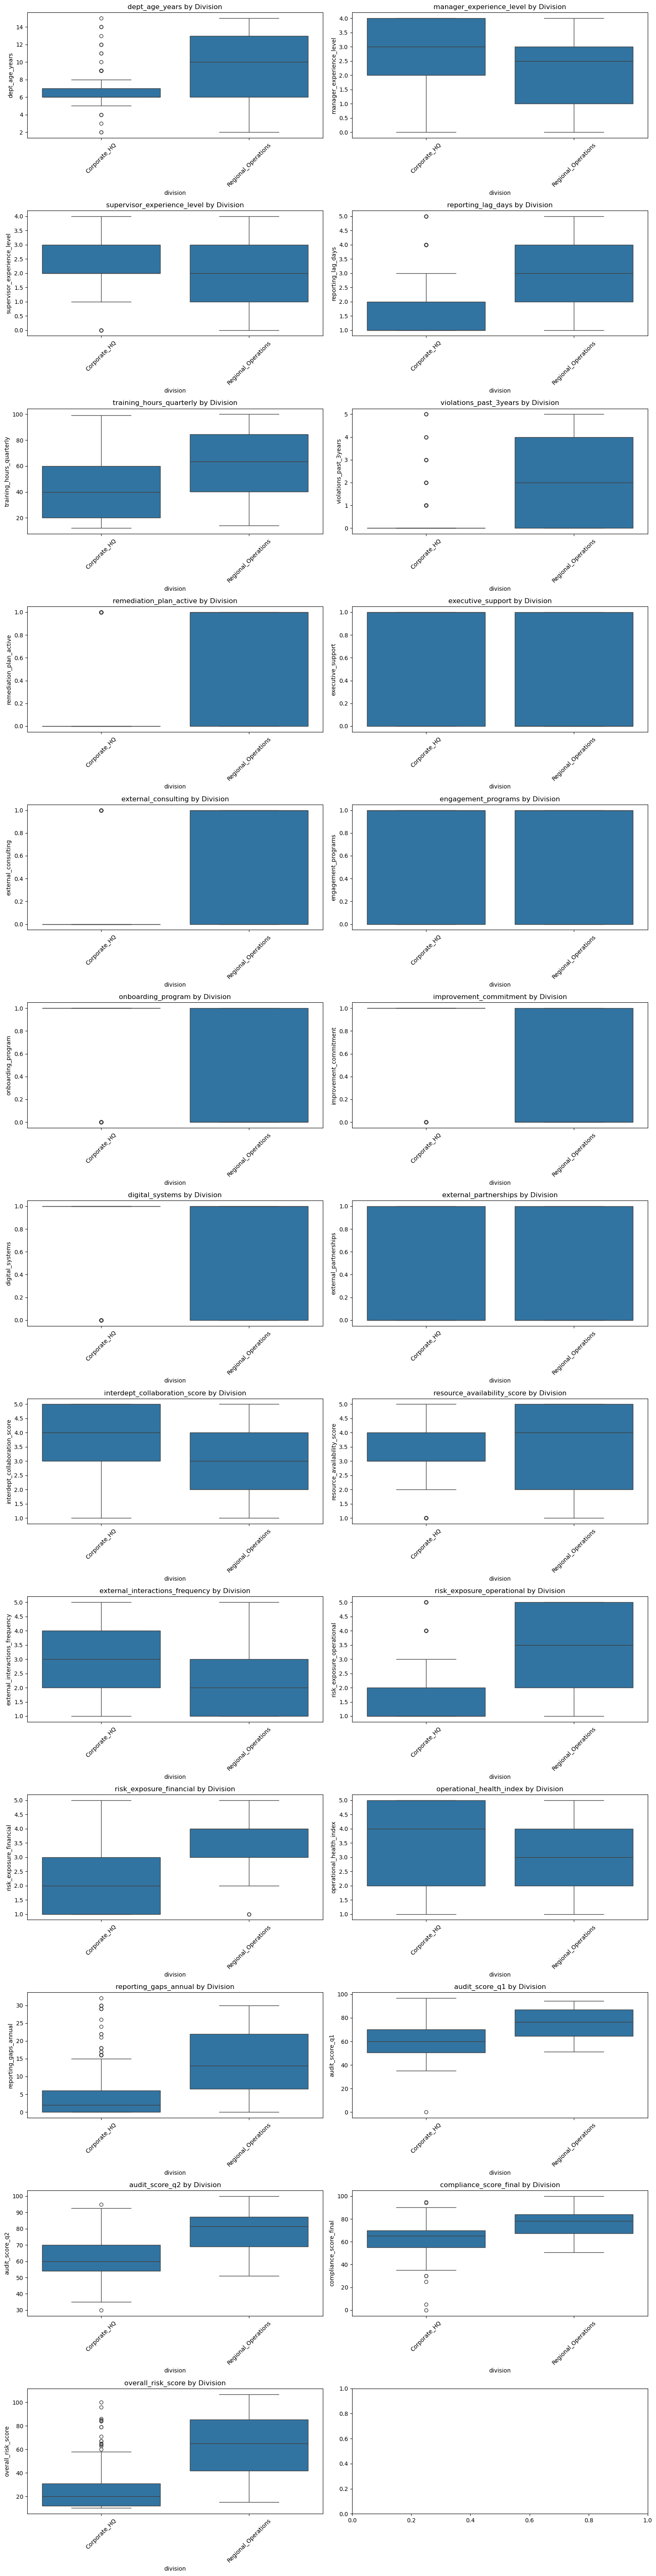

In [188]:
division_analysis = departments.groupby('division').agg({
    col: ['mean', 'std'] for col in num_cols
}).round(2)

print(f"\nMean and standard deviation by Division:")
print(division_analysis)

# Statistical test for division differences (ANOVA)
from scipy.stats import f_oneway

print(f"\nANOVA F-test results (testing if means differ significantly by division):")
for col in num_cols:
    # Skip columns with too many missing values
    if departments[col].notnull().sum() < 2:
        continue
    groups = [group[col].dropna().values for name, group in departments.groupby('division')]
    if len(groups) > 1:  # ANOVA requires at least 2 groups
        f_stat, p_value = f_oneway(*groups)
        significance = "Significant" if p_value < 0.05 else "Not significant"
        print(f"{col}: F={f_stat:.3f}, p={p_value:.3f} ({significance})")


fig, axes = plt.subplots(len(num_cols)//2 + len(num_cols)%2, 2, figsize=(16, len(num_cols)*2.5))
axes = axes.ravel()

for i, col in enumerate(num_cols):
    sns.boxplot(data=departments, x='division', y=col, ax=axes[i])
    axes[i].set_title(f'{col} by Division')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

> Descriptive Differences:
> - Corporate_HQ departments are generally younger and have lower overall risk (mean 24.46) than Regional_Operations (mean 64.0).
> - Regional_Operations shows higher training hours, audit/compliance scores, and risk exposure metrics, reflecting more mature but risk-prone operations.
>   
>ANOVA Results:
>- Significant differences (p < 0.05) are found for most operational, risk, and compliance metrics (e.g., violations_past_3years, reporting_lag_days, audit scores, risk exposures).
>- Non-significant differences exist in managerial experience, executive support, engagement programs, and operational health index.
>  
> Visual Insights:
>- Boxplots reveal higher spread and outliers in Regional_Operations, while Corporate_HQ features are tightly clustered.
> Implications:
>- Division is a strong categorical variable for predictive modeling of risk.
>- Features showing significant division differences may need division-specific scaling or interaction terms.
>- Non-significant features might contribute less predictive value but are still relevant contextually.


#### **2. Table `"risk_summary_by_division"`**  